Thelei na xrhsimopoihsoume ta klademena dedomena tis askishs 2

In [304]:
def getTagsHandles(x):
    symbols = [' ', '\n', ',', '.', '/', '&', '?', ';', '[', ']', '!', ':', '•', '\\', ')']
    index = 0
    word = ""
    hh = []

    while(index < len(x)):
        if(x[index] == "@" or x[index] == "#"):
            if(word == ""):
                word = word + x[index]
            else:
                if(len(word) == 1):
                    word = "" + x[index]
                else:
                    hh.append(word)
                    word = ""
                    continue
        elif(x[index] in symbols or ord(x[index]) == 8230):
            if(word != ""):
                hh.append(word)
                word = ""
        else:
            if(word == ""):
                index = index + 1
                continue
            else:
                word = word + x[index]

        index = index + 1
    if(len(word) > 1):
        hh.append(word)
        
    return (hh)

In [305]:
import winsound
import time
import sys

f = open("../task2/twitter_dataset.txt", "r")
c = 0
userName = {}
username = ""
geolocation = "GeoLocation;@"
dictionaryForHashtagsHandles = {}

start = time.clock()
for line in f:
    c = c + 1
    line = line.replace('\t', " ")
    splittedTweet = line.split(" ")
    for i in range(len(splittedTweet)):
        if(splittedTweet[i].isdigit()):
            if(not(splittedTweet[i - 1] in userName)):
                userName[splittedTweet[i - 1]] = []
                username =splittedTweet[i - 1]
            break
    if (not("RT" in splittedTweet)):
        isEmpty = True
        for item in splittedTweet:
            if ("#" in item or "@" in item):
                if("@" in item):
                    if(geolocation in item):
                        continue
                for element in getTagsHandles(item):
                    isEmpty = False
                    element = element.lower()
                    if(not(element in dictionaryForHashtagsHandles)):
                        dictionaryForHashtagsHandles[element] = 1
                    else:
                        dictionaryForHashtagsHandles[element] = dictionaryForHashtagsHandles[element] + 1
                    userName[username].append(element)

f.close()
end = time.clock()
print("TIME: " + str(end - start) + "\n")
winsound.Beep(400, 2500)

TIME: 680.6753962389048



In [306]:
print("How many users: " + str(len(userName)) + "\n")
print("How many hashtags & handles: " + str(len(dictionaryForHashtagsHandles)))

How many users: 305245

How many hashtags & handles: 648150


In [307]:
import winsound
import time 

usersNameCountDictionary = {}
userNameCounter = {}
userNameListWithSumUpTwenty = {}
hashtagsHandlesWithSumUpTwenty = {}
newSetForHashtagsHandles = []

start = time.clock()
for i in userName:
    if(len(userName[i]) < 20):
        #userNameListWithSumUpTwenty[i] = set([])
        continue
    if(len(set(userName[i])) > 20):
        userNameListWithSumUpTwenty[i] = set(userName[i])

for i in dictionaryForHashtagsHandles:
    if(dictionaryForHashtagsHandles[i] > 20):
        hashtagsHandlesWithSumUpTwenty[i] = dictionaryForHashtagsHandles[i]
        newSetForHashtagsHandles.append(i)

newSetForHashtagsHandles = set(newSetForHashtagsHandles)
end = time.clock()
print("TIME: " + str(end - start) + "\n")
print("How many users up 20: " + str(len(userNameListWithSumUpTwenty)) + "\n")
print("How many hashtags & handles up 20: " + str(len(hashtagsHandlesWithSumUpTwenty)) + "\n")
winsound.Beep(400, 2500)

TIME: 2.853195993040572

How many users up 20: 17658

How many hashtags & handles up 20: 26661



In [308]:
import winsound
import time

start = time.clock()
lenBefore = 110
lenAfter = 100
cBefore = 110
cAfter = 100

while(lenBefore > lenAfter):
    
    #To periexomeno tou lexikou diamorfwnete, twra o kathe xrhsths exei san value ta nea hashtags kai handles
    #me vasi auta pou einai twra sto synolo me sum > 20
    newSetForUser = []
    for users in userNameListWithSumUpTwenty:
        for items in userNameListWithSumUpTwenty[users]:
            if(items in newSetForHashtagsHandles):
                newSetForUser.append(items)
        userNameListWithSumUpTwenty[users] = set(newSetForUser)
        newSetForUser = []
    
    #Tha valw timh = 0 gia tous xrhstes me sum < 20
    cAfter = 0
    for users in userNameListWithSumUpTwenty:
        if(len(set(userNameListWithSumUpTwenty[users])) < 20):
            userNameListWithSumUpTwenty[users] = set([])
        else:
            if(len(set(userNameListWithSumUpTwenty[users])) > 20):
                cAfter = cAfter + 1
                
    print("Users after: " + str(cAfter) + "\n")
    
    #Tha mhdenisw to plithos twn hashtags kai handles pou eixa mesa sto lexiko mou
    for items in hashtagsHandlesWithSumUpTwenty:
        hashtagsHandlesWithSumUpTwenty[items] = 0
    
    #The metrisw to kainourio plithos tous xana
    for users in userNameListWithSumUpTwenty:
        for items in userNameListWithSumUpTwenty[users]:
            if(items in newSetForHashtagsHandles):
                hashtagsHandlesWithSumUpTwenty[items] = hashtagsHandlesWithSumUpTwenty[items] + 1
        lenBefore = len(newSetForHashtagsHandles)

    print("Size of hashtags and handles Before: " + str(lenBefore) + "\n")
    
    #Ftiaxnw xana to neo synolo me ta hashtags kai handles pou exoun sum > 20
    newSetForHashtagsHandles = set([])
    for items in hashtagsHandlesWithSumUpTwenty:
        if(hashtagsHandlesWithSumUpTwenty[items] > 20):
            newSetForHashtagsHandles.add(items)
        lenAfter = len(newSetForHashtagsHandles)
    print("Size of hashtags and handles After: " + str(lenAfter) + "\n")  

end = time.clock()
print("TIME: " + str(end - start) + "\n")
print("How many users up 20: " + str(cAfter))
winsound.Beep(400, 2700)

Users after: 8096

Size of hashtags and handles Before: 26661

Size of hashtags and handles After: 3424

Users after: 5771

Size of hashtags and handles Before: 3424

Size of hashtags and handles After: 2835

Users after: 5454

Size of hashtags and handles Before: 2835

Size of hashtags and handles After: 2722

Users after: 5377

Size of hashtags and handles Before: 2722

Size of hashtags and handles After: 2691

Users after: 5362

Size of hashtags and handles Before: 2691

Size of hashtags and handles After: 2686

Users after: 5360

Size of hashtags and handles Before: 2686

Size of hashtags and handles After: 2685

Users after: 5360

Size of hashtags and handles Before: 2685

Size of hashtags and handles After: 2684

Users after: 5360

Size of hashtags and handles Before: 2684

Size of hashtags and handles After: 2684

TIME: 17.473824565735413

How many users up 20: 5360


In [702]:
finalUsers = {}

for i in userNameListWithSumUpTwenty:
    if(len(userNameListWithSumUpTwenty[i]) > 20):
        finalUsers[i] = userNameListWithSumUpTwenty[i]
print(str(len(finalUsers)))

5360


In [703]:
finalHashtagsHandles = {}

for i in hashtagsHandlesWithSumUpTwenty:
    if(hashtagsHandlesWithSumUpTwenty[i] > 20):
        finalHashtagsHandles[i] = hashtagsHandlesWithSumUpTwenty[i]
print(str(len(finalHashtagsHandles)))

2684


Gia tous xrhstes tha allaxw thn timh tous san lista

In [704]:
finalHashtagsHandlesPeriexomenoLista = {}

for users in finalUsers:
    finalHashtagsHandlesPeriexomenoLista[users] = list(finalUsers[users])

In [705]:
finalHashtagsHandlesList = []

for hashtags in finalHashtagsHandles:
    finalHashtagsHandlesList.append(hashtags)

In [706]:
print(finalHashtagsHandlesList[0:5])

['@nissanusa', '#heismanhouse', '@vine', '@brithume', '@donaldjtrumpjr']


In [707]:
for i in finalUsers:
    print(i)
    print(finalUsers[i])
    break

wooster6
{'#truth', '#bleachbit', '#prolife', '#washington', '@breitbartnews', '#emails', '#abedin', '#faith', '@veteran4trump', '#trump', '@realdonaldtrump', '#trumppence', '@amymek', '#liberal', '#hillary', '#america', '#draintheswamp', '@callisto1947', '#email', '#vote', '#comey', '#lorettalynch', '#economy', '#corruption', '#trumppence16', '@debtassassin1', '#election2016', '#canada', '#hillaryclinton', '#women'}


Dialege 10% twn xrhstwn

In [708]:
import winsound
import random

tenPer = len(finalUsers)*(0.10)
print("I will select " + str(tenPer) + "users")

#Tha friaxw mia lista me ta onomata twn users. Dhladh an epilegei apo ton xrhsth 50 na afairesw kapoio hashtag na xerw poios einai
nameUsersList = []
for names in finalUsers:
    nameUsersList.append(names)

#Thelw na dialexw 536 diaforetikous xrhstes
x = []
sizeOfNumbers = 0
while(sizeOfNumbers < tenPer):
    userNumber = random.randint(0, len(nameUsersList) - 1)
    x.append(userNumber)
    sizeOfNumbers = len(set(x))

#Thelw na vage sthn lista x tous arithmous pou ekproswpoun kai einai diaforetikoi o enas apo ton allon
chooseUsers = []
for i in set(x):
    chooseUsers.append(i)

#Prepei na dialexw poioi hashtag/handle tha afairesw
hashtagsHandlesHaveRemove = []
for number in chooseUsers:
    userNameChoose = nameUsersList[number]
    sizeOfListHHForTheUser = len(finalUsers[userNameChoose])
    randomHashtag = random.randint(0, sizeOfListHHForTheUser - 1)
    hashtagToRemove = finalHashtagsHandlesPeriexomenoLista[userNameChoose][randomHashtag]
    #print(hashtagToRemove)
    hashtagsHandlesHaveRemove.append(hashtagToRemove)
    finalHashtagsHandlesPeriexomenoLista[userNameChoose].remove(hashtagToRemove)
    print("For users \"" + str(userNameChoose) + "\": " + str(list(finalUsers[userNameChoose])[randomHashtag]))
    
winsound.Beep(450, 1000)

I will select 536.0users
For users "127bama": @hotlinejosh
For users "Stilgar3": @fbi
For users "Retiree07": @erictrump
For users "theUKtoday": #potus
For users "JPBatl": @davidaxelrod
For users "ScarpMichael": @foxnews
For users "BirdingTrip": @politico
For users "midsgt": @cnnpolitics
For users "stinkpickle1976": @ericbolling
For users "lindaantonO": @detroitnews
For users "headkel": @drudge_report
For users "jnjsmom": @martinomalley
For users "karindarby": #maga
For users "arjanomics": @katyturnbc
For users "EnoughisEnoug13": @seanhannity
For users "brobans": @danney_williams
For users "get": @chelseaclinton
For users "LFS7": @robbymook
For users "VenableAaron": @truethevote
For users "jbreesenaz": @joebiden
For users "pfmcmanus36": #kellyfile
For users "jakub_lisa": #corruptmedia
For users "99blujeep": #2a
For users "LVMyKINGS": @friendlyjmc
For users "rklee24": @obamamalik
For users "ckirmser": @speakerryan
For users "AmzyVic": @foxnews
For users "Jthemovielover": @kthopkins
For u

MostPopular

In [709]:
def mostPopular(name, k):
    dictionaryToFindMax = {}
    for hh in finalHashtagsHandlesList:
        setForHH = set(finalHashtagsHandlesPeriexomenoLista[name])
        if(not(hh in setForHH)):
            plithosHashtagHandle = finalHashtagsHandles[hh]
            dictionaryToFindMax[hh] = plithosHashtagHandle
    dictionaryToFindMax = sorted(dictionaryToFindMax.items(), key = operator.itemgetter(1))
    dictionaryToFindMax = dictionaryToFindMax[::-1]
    kUsers = dictionaryToFindMax[0:k]
    returnList = []
    for j in kUsers:
        returnList.append(j[0])
    return(returnList)

Plithos epityxiwn: [32, 44, 49, 55, 57, 62, 62, 68, 71, 75, 76, 80, 83, 84, 89, 96, 100, 101, 106, 109]


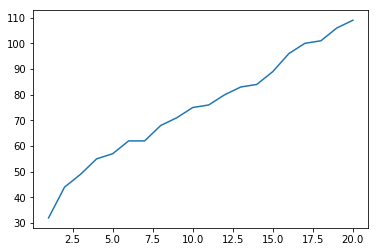

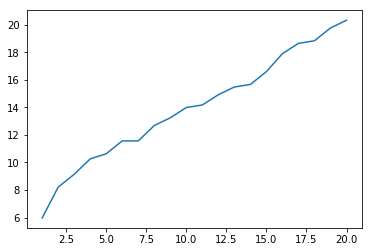

In [710]:
import operator 
import winsound
import matplotlib.pyplot as plt

epityxies = [0]*20

c = -1
for number in chooseUsers:
    name = nameUsersList[number]
    c = c + 1
    hashtagToCheck = hashtagsHandlesHaveRemove[c]
    for k in range(1, 21):
        kBest = mostPopular(name, k)
        kBest = set(kBest)
        if(hashtagToCheck in kBest):
            epityxies[k - 1] = epityxies[k - 1] + 1

print("Plithos epityxiwn: " + str(epityxies))
x = []
for i in range(1, 21):
    x.append(i)
plt.plot(x, epityxies)
plt.show()

y = []
for i in epityxies:
    y.append((i/float(tenPer)) * 100)
plt.plot(x, y)
plt.show()
winsound.Beep(450, 2000)

User-based Collaborative Filtering(UCF)

In [711]:
def jaccardSimilarity(x, y):
    union = len(x | y)
    intersection = len(x & y)
    return(intersection/float(union))

In [712]:
def ucf(name, m):
    jsDictionary = {}
    x = set(finalHashtagsHandlesPeriexomenoLista[name])
    for allUsers in finalUsers:
        y = finalUsers[allUsers]
        jsDictionary[name + "-" + allUsers] = jaccardSimilarity(x, y)
    jsDictionary = sorted(jsDictionary.items(), key = operator.itemgetter(1))
    jsDictionary = jsDictionary[::-1]
    mSimilarUsers = jsDictionary[1:m + 1]
    geitones = []
    similarity = []
    for i in mSimilarUsers:
        sim = float(i[1])
        similarity.append(sim)
        user = i[0]
        user = user.replace(name, "")
        user = user.replace("-", "")
        user = user.replace(" ", "")
        geitones.append(user)
    scoreForEveryHashtagHandle = {}
    for i in finalHashtagsHandles:
        scoreForEveryHashtagHandle[i] = 0
    for neig in range(len(geitones)):
        if(not(geitones[neig] in finalUsers)):
            continue
        hashtagHandleApoGeitones = list(finalUsers[geitones[neig]])
        for hasHan in hashtagHandleApoGeitones:
            scoreForEveryHashtagHandle[hasHan] = scoreForEveryHashtagHandle[hasHan] + similarity[neig]
    scoreForEveryHashtagHandle = sorted(scoreForEveryHashtagHandle.items(), key = operator.itemgetter(1))[::-1]
    #Pairnw ta k = 10 kalytera
    pairnwTaKBest = scoreForEveryHashtagHandle[0:10]
    returnList = []
    for i in pairnwTaKBest:
        returnList.append(i[0])
    return(returnList)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

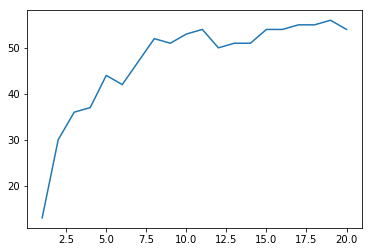

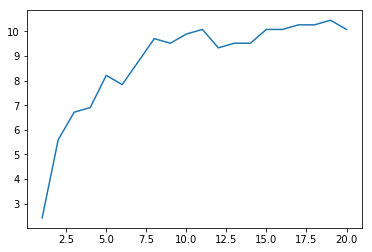

In [713]:
import winsound
import matplotlib.pyplot as plt

epityxies = []
x = []
mm = 1
while(mm <= 20):
    epityxies.append(0)
    x.append(mm)
    mm = mm + 1
    
c = -1 
for number in chooseUsers:
    name = nameUsersList[number]
    c = c + 1
    print(c)
    hashtagToCheck = hashtagsHandlesHaveRemove[c]
    #Tha epistrefw ta 10 best gia diafora m
    forM = -1
    m = 1
    while(m <= 20):
        forM = forM + 1
        kBest = ucf(name, m)
        kBest = set(kBest)
        if(hashtagToCheck in kBest):
            epityxies[forM] = epityxies[forM] + 1
        m = m + 1
print("Plitos epityxiwn: " + str(epityxies))
plt.plot(x, epityxies)
plt.show()

y = []
for i in epityxies:
    y.append((i/float(tenPer)) * 100)
plt.plot(x, y)
plt.show()
winsound.Beep(450, 2000)

Item-based Collaborative Filtering (ΙCF)

In [721]:
def icf(lis):
    hashtagsThatUserUse = lis
    listaMeHashtagsHandlesDONTUse = []
    for hh in finalHashtagsHandlesList:
        if(not(hh in set(hashtagsThatUserUse))):
            listaMeHashtagsHandlesDONTUse.append(hh)
    dictionary = {}
    print(len(listaMeHashtagsHandlesDONTUse))
    l = 0
    for hasHan in listaMeHashtagsHandlesDONTUse:
        l = l + 1
        print(l)
        for users in finalUsers:
            t = finalHashtagsHandlesPeriexomenoLista[users]
            t = set(t)
            if(hasHan in t):
                if(hasHan in dictionary):
                    dictionary[hasHan].append(users)
                else:
                    dictionary[hasHan] = [users]
    userDictionary = {}
    print(len(hashtagsThatUserUse))
    l = 0
    for hasHan in hashtagsThatUserUse:
        l = l + 1
        print(l)
        for users in finalUsers:
            t = finalHashtagsHandlesPeriexomenoLista[users]
            t = set(t)
            if(hasHan in t):
                if(hasHan in userDictionary):
                    userDictionary[hasHan].append(users)
                else:
                    userDictionary[hasHan] = [users]
    allDictionary = {}
    for i in listaMeHashtagsHandlesDONTUse:
        x = set(dictionary[i])
        allDictionary[i] = {}
        for j in userDictionary:
            y = set(userDictionary[j])
            allDictionary[i][j] = jaccardSimilarity(x, y)
    return(allDictionary)

def icf2(allDictionary, name, m):
    hashtagsThatUserUse = set(finalHashtagsHandlesPeriexomenoLista[name])
    mBestDictionary = {}
    score = {}
    for i in allDictionary:
        score[i] = 0
        mBestDictionary[i] = sorted(allDictionary[i].items(), key = operator.itemgetter(1))[::-1]
        mBD = []
        for j in mBestDictionary[i]:
            if(j[0] in hashtagsThatUserUse):
                mBD.append(j)
        if(len(mBD) < m):
            mBestSimilar = mBD[:]
        else:
            mBestSimilar = mBD[0:m]
        for ol in mBestSimilar:
            ss = ol[1]
            score[i] = score[i] + ss
    score = sorted(score.items(), key = operator.itemgetter(1))[::-1]
    kBestEp = score[0:10]
    returnList = []
    for i in kBestEp:
        returnList.append(i[0])
    return(returnList)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


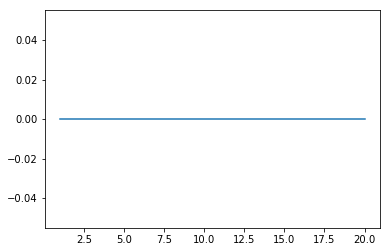

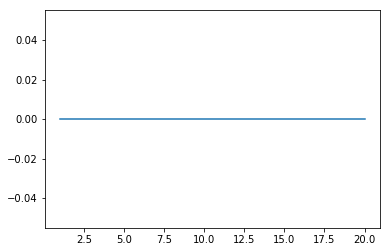

In [722]:
import winsound 
import matplotlib.pyplot as plt

epityxies = []
x = []
mm = 1
while(mm <= 20):
    epityxies.append(0)
    x.append(mm)
    mm = mm + 1
    
c = -1
lis = []
lll = 0
for number in chooseUsers:
    lll = lll + 1
    print(lll)
    name = nameUsersList[number]
    lis = lis + finalHashtagsHandlesPeriexomenoLista[name]
lis = set(lis)
lis = list(lis)
dicti = icf(lis)

for number in chooseUsers:
    name = nameUsersList[number]
    c = c + 1
    print(c)
    hashtagToCheck = hashtagsHandlesHaveRemove[c]
    #Tha epistrefw ta 10 best gia diafora m
    forM = -1
    m = 1
    while(m <= 20):
        #print(m)            
        kBest = icf2(dicti, name, m)
        kBest = set(kBest)
        if(hashtagToCheck in kBest):
            epityxies[forM] = epityxies[forM] + 1
        m = m + 1

print("Plitos epityxiwn: " + str(epityxies))
plt.plot(x, epityxies)
plt.show()

y = []
for i in epityxies:
    y.append((i/float(tenPer)) * 100)
plt.plot(x, y)
plt.show()
winsound.Beep(450, 2000)

Singular Value Decomposition (SVD)

O pinakas me onoma "array" einai o araios pinakas me 0/1 opou ston xasis einai oi xrhstes kai ston yasis einai ta hashtags/handles

In [714]:
import numpy as np
import numpy
import winsound 

array = []
for i in range(0, len(finalHashtagsHandles)):
    array.append([0]*len(finalUsers)) 

hhUser = []
c = -1 
us = -1 
for i in finalHashtagsHandles:
    us = us + 1
    c = -1
    hhUser.append([])
    hh = i
    for j in finalHashtagsHandlesPeriexomenoLista:
        c = c + 1
        t = set(finalHashtagsHandlesPeriexomenoLista[j])
        if(hh in t):
            hhUser[us].append(c)
c = -1 
for i in hhUser:
    c = c + 1
    for j in i:
        array[c][j] = 1
myArray = np.array(array)
print(myArray)
print(myArray.shape)
winsound.Beep(450, 2000)

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
(2684, 5360)


Tha vrw kai ton Anastrofo tou pinaka "myarray"

In [715]:
myArrayT = myArray.T
print(myArrayT)

[[0 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


Vriskw to SDV tou pinaka "myArray"

In [716]:
U, S, V = linalg.svd(myArray, full_matrices=False)
print(U.shape, S.shape, V.shape)

(2684, 2684) (2684,) (2684, 5360)


Gia diafores times tou m = [1,20] prepei na vrw ekei pou kanei to kalytero gonato

m: 1


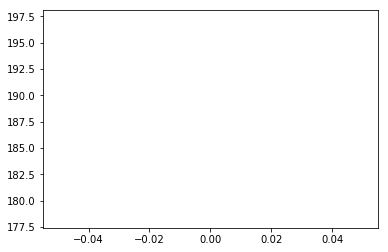

m: 2


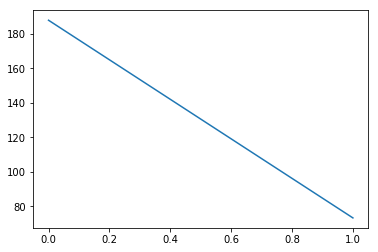

m: 3


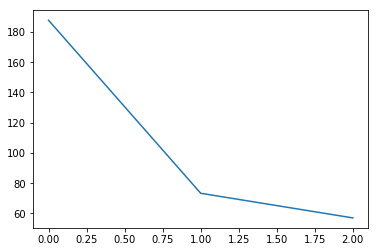

m: 4


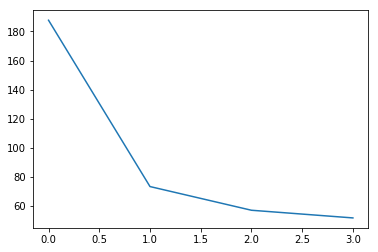

m: 5


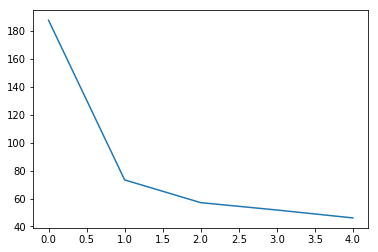

m: 6


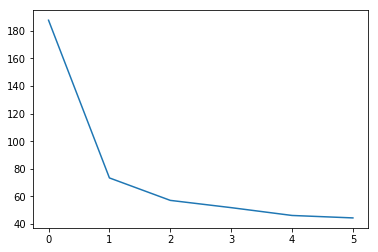

m: 7


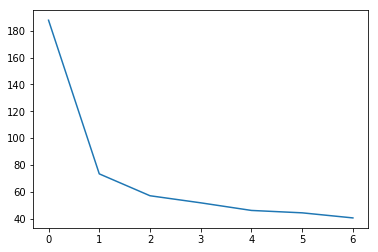

m: 8


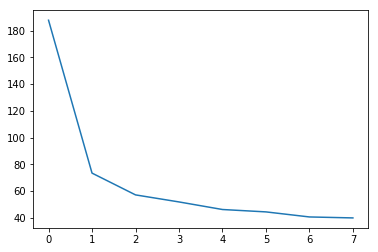

m: 9


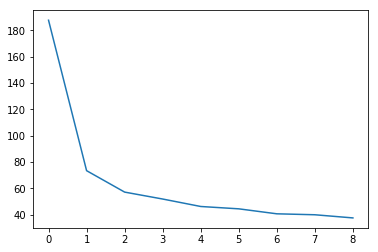

m: 10


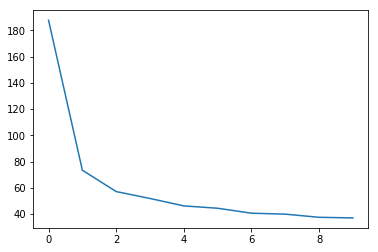

m: 11


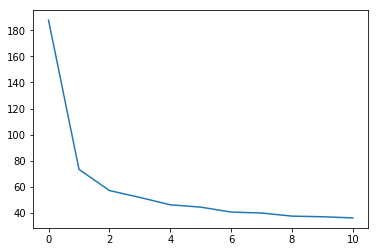

m: 12


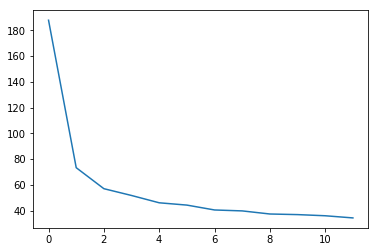

m: 13


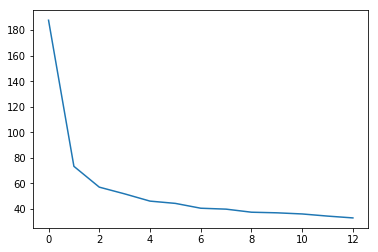

m: 14


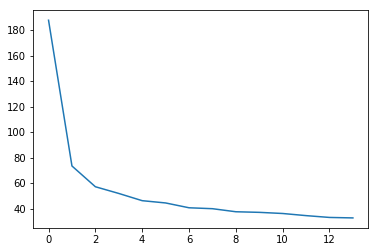

m: 15


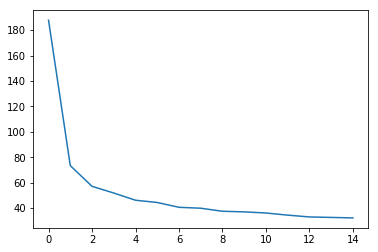

m: 16


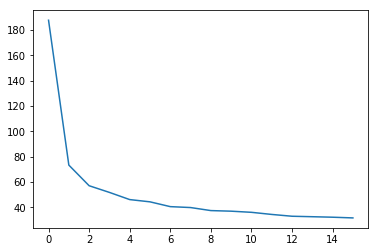

m: 17


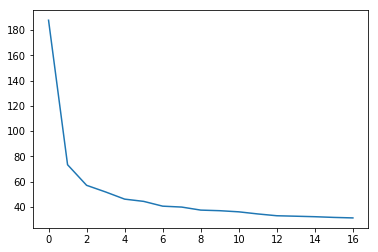

m: 18


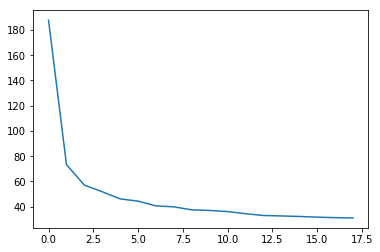

m: 19


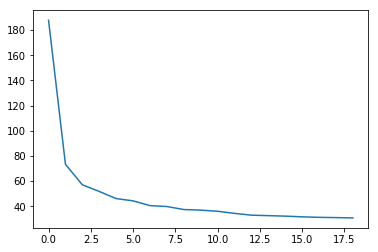

m: 20


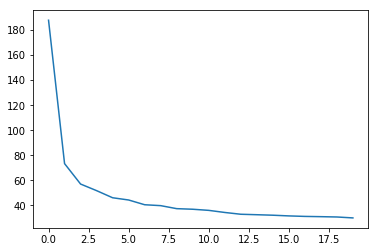

In [717]:
import matplotlib.pyplot as plt

for m in range(1, 21):
    print("m: " + str(m))
    plt.plot(S[0:m])
    plt.show()

Apo tis grafikes parapanw fainetai oti otan to rank einai 3 to gonato einai sthn timh 1 dhladh oti mporei na anaparastathei o pinakas kai me mia mono sthlh. Opote tha dialexw 3-rank.

In [718]:
def svd(name, number, k, Mr):
    #Tha parw thn sthlh me ton arithmo number
    userScore = []
    for i in Mr:
        userScore.append(i[number])
    #Tha krathsw se ena lexiko ta hh pou den exei xrhsimopoihsei kai tis times tous
    t = set(finalHashtagsHandlesPeriexomenoLista[name])
    userScoreD = {}
    nhh = -1
    for hh in finalHashtagsHandlesList:
        nhh = nhh + 1
        if(not(hh in t)):
            userScoreD[hh] = userScore[nhh]
    userScoreD = sorted(userScoreD.items(), key = operator.itemgetter(1))[::-1]
    kBestList = userScoreD[0:k]
    kBest = []
    for i in kBestList:
        kBest.append(i[0])
    return(kBest)

Ftiaxnw ton pinaka Mr

In [719]:
import winsound

m = 3
 
Ur = []
for i in range(0, len(finalHashtagsHandlesList)):
    Ur.append([])
    for j in range(0, m):
        Ur[i].append(U[i][j])

Vr = []
for i in range(0, m):
    Vr.append([])
    for j in range(0, len(finalUsers)):
        Vr[i].append(V[i][j])

Sr = [[0 for col in range(m)] for row in range(m)]
for i in range(len(Sr)):
    Sr[i][i] = S[i]

A = np.dot(Ur, Sr)
Mr = np.dot(A, Vr)
winsound.Beep(450, 2000)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

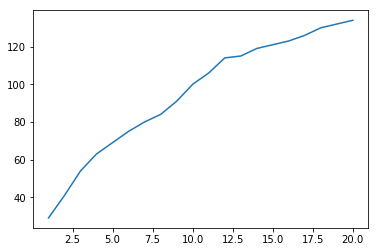

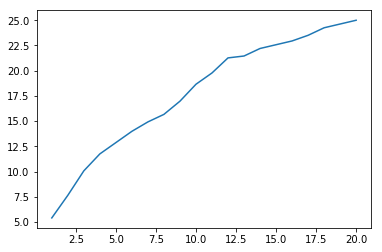

In [720]:
import winsound
import matplotlib.pyplot as plt

x = []
mm = 1
while(mm <= 20):
    x.append(mm)
    mm = mm + 1
    
c = -1
epityxies = [0]*20
kF = -1 

for number in chooseUsers:
    name = nameUsersList[number]
    c = c + 1
    print(c)
    hashtagToCheck = hashtagsHandlesHaveRemove[c]
    for i in range(len(finalHashtagsHandlesList)):
        if(finalHashtagsHandlesList[i] == hashtagToCheck):
            numberForHashtagToCheck = i
    k = 1
    kF = -1
    while(k <= 20):
        kF = kF + 1
        kBest = svd(name,number, k, Mr)
        kBest = set(kBest)
        if(hashtagToCheck in kBest):
            epityxies[kF] = epityxies[kF] + 1
        k = k + 1

print("Plitos epityxiwn: " + str(epityxies))
plt.plot(x, epityxies)
plt.show()

y = []
for i in epityxies:
    y.append((i/float(tenPer)) * 100)
plt.plot(x, y)
plt.show()
winsound.Beep(450, 2000)